<p><font size="6"><b>Coordinaat referentie systemen</b></font></p>


> *GCCA+ phase 2 - Geopyhton training*  
> *June, 2023*
>
> *© 2023, Jasper Feyen  (<mailto:jasperfeyen@hotmail.com>)*
---

In [5]:
%matplotlib inline

import pandas as pd
import geopandas

In [6]:
countries = geopandas.read_file("data/ne_10m_admin_0_countries.zip")
#cities = geopandas.read_file("data/ne_110m_populated_places.zip")
#rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

## Coördinaatreferentiesystemen

Tot nu toe hebben we geometrische gegevens gebruikt met bepaalde coördinaten zonder verder na te denken over wat die coördinaten betekenen of hoe ze worden uitgedrukt.

> Het **Coördinaatreferentiesysteem (CRS)** relateert de coördinaten aan een specifieke locatie op aarde.

Voor een gedetailleerde uitleg, zie [hier](https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html).


### Geografische coördinaten

> Graden van breedtegraad en lengtegraad.
>
> Bijvoorbeeld: 48°51′N, 2°17′O

De meest bekende vorm van coördinaten zijn geografische coördinaten: we definiëren een positie op de aarde in graden van breedtegraad en lengtegraad, relatief ten opzichte van de evenaar en de nulmeridiaan. Met dit systeem kunnen we gemakkelijk elke locatie op aarde specificeren. Het wordt veel gebruikt, bijvoorbeeld in GPS. Als je de coördinaten van een locatie in Google Maps bekijkt, zie je ook breedtegraad en lengtegraad.

**Let op!**

In Python gebruiken we (lon, lat) en niet (lat, lon).

- Lengtegraad: [-180, 180]
- Breedtegraad: [-90, 90]



### Projected coordinates

> `(x, y)`-coördinaten zijn meestal uitgedrukt in meters of voet

Hoewel de aarde een bol is, representeren we deze meestal op een plat oppervlak: denk aan een fysieke kaart of de figuren die we met Python op ons computerscherm hebben gemaakt. Het omzetten van de bolvormige aarde naar een platte kaart noemen we een *projectie*.

![](../img/projection.png)

We projecteren het oppervlak van de aarde op een 2D-vlak, zodat we locaties kunnen uitdrukken in cartesiaanse x- en y-coördinaten op een plat oppervlak. In dit vlak werken we meestal met een lengte-eenheid zoals meters in plaats van graden, wat de analyse handiger en effectiever maakt.

Er is echter een belangrijke opmerking: de driedimensionale aarde kan nooit perfect worden gerepresenteerd op een tweedimensionale kaart, dus projecties introduceren onvermijdelijk vervormingen. Om dergelijke fouten te minimaliseren, zijn er verschillende benaderingen voor projecties, elk met specifieke voordelen en nadelen.

Sommige projectiesystemen proberen de oppervlakte van geometrieën te behouden, zoals de Albers-gelijkheidsprojectie. Andere projectiesystemen proberen hoeken te behouden, zoals de Mercator-projectie, maar zullen grote vervormingen in het oppervlak laten zien. Elk projectiesysteem zal altijd enige vervorming van oppervlakte, hoek of afstand hebben.

<table><tr>
<td> <img src="../img/projections-AlbersEqualArea.png"/> </td>
<td> <img src="../img/projections-Mercator.png"/> </td>
</tr>
<tr>
<td> <img src="../img/projections-Robinson.png"/> </td>
</tr></table>


**Projected vs werkelijke grootte (Mercator projection)**:

![](../img/mercator_projection_area.gif)

## Coordinaten Referentie Systemen in Python / GeoPandas

Een GeoDataFrame of GeoSeries heeft een `.crs`-attribuut dat (optioneel) een beschrijving bevat van het coördinatenreferentiesysteem van de geometrieën:


In [7]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For the `countries` dataframe, it indicates that it uses the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used for geographic coordinates.


It uses coordinates as latitude and longitude in degrees, as can you be seen from the x/y labels on the plot:

<AxesSubplot:>

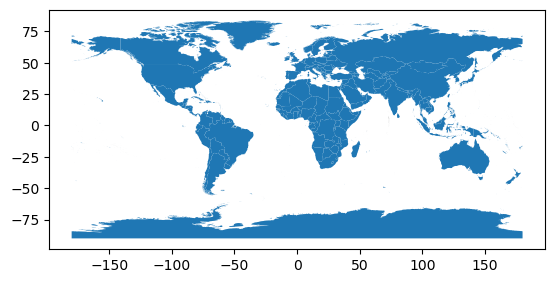

In [8]:
countries.plot()

De `.crs`-eigenschap retourneert een `pyproj.CRS`-object. Om een CRS te specificeren, gebruiken we meestal een stringrepresentatie:

- **EPSG-code**
  
  Voorbeeld: `EPSG:4326` = WGS84 geografisch CRS (lengtegraad, breedtegraad)
  
- **Well-Know-Text (WKT)**-representatie

- In oudere software en datasets kom je mogelijk ook een "`proj4`-string" -representatie tegen:
  
  Voorbeeld: `+proj=longlat +datum=WGS84 +no_defs`

  Dit wordt echter niet langer aanbevolen.

Zie bijvoorbeeld https://epsg.io/4326

Onder de motorkap gebruikt GeoPandas de `pyproj` / `PROJ`-bibliotheken om te werken met herprojecties.

Voor meer informatie kun je ook kijken op http://geopandas.readthedocs.io/en/latest/projections.html.


### Transformeren naar een ander CRS

We kunnen een GeoDataFrame naar een ander referentiesysteem (CRS) converteren met behulp van de `to_crs`-functie.

Bijvoorbeeld, laten we de landen converteren naar de World Mercator-projectie (http://epsg.io/3395):


In [9]:
# Verwijder Antarctica, want mercator kan niet goed hiermee overweg
countries = countries[(countries['name'] != "Antarctica")]

In [10]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs("EPSG:3395")

<AxesSubplot:>

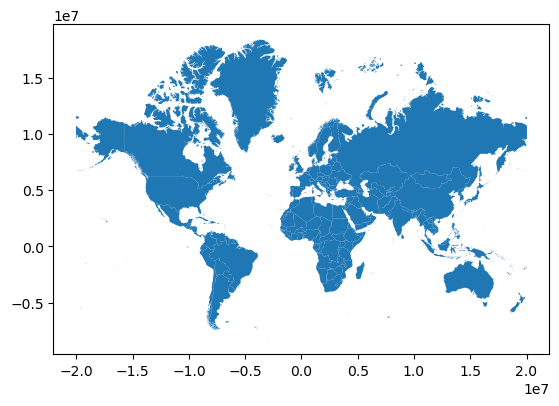

In [11]:
countries_mercator.plot()

### Waarom een een CRS herprojecteren?

Er kunnen goede redenen zijn om het coördinatenreferentiesysteem (CRS) van je dataset te veranderen, bijvoorbeeld:

- Verschillende bronnen met verschillende CRS -> moeten converteren naar hetzelfde CRS

    ```python
    df1 = geopandas.read_file(...)
    df2 = geopandas.read_file(...)

    df2 = df2.to_crs(df1.crs)
    ```

- Cartografie (vervorming van vormen en afstanden)

- Berekeningen op basis van afstand / oppervlakte -> zorg ervoor dat je een geschikt geprojecteerd coördinatensysteem gebruikt dat is uitgedrukt in een zinvolle eenheid zoals meters of voet (niet graden).

<div class="alert alert-info" style="font-size:120%">

**LET OP:**

Alle berekeningen die plaatsvinden in GeoPandas en Shapely gaan ervan uit dat je gegevens zich bevinden in een 2D-cartesisch vlak. Daarom zal het resultaat van die berekeningen alleen correct zijn als je gegevens correct geprojecteerd zijn.

</div>


## Enkele oefeningen!

We laden een nieuwe dataset in die de districten in Suriname bevat, ditmaal in geografische coordinaten (WGS64).

Om deze data te converteren gebruiken we het coordinatensysteem voor Suriname WGS84/UTM 21N, EPSG: EPSG:32621
Om de convertie mogelijk te maken, doen we beroep op de EPSG-code: `EPSG:32621` 

<div class="alert alert-success">

**OEFENING 1: Projecteren van een GeoDataFrame**

* Lees de districten in (`"data/Suriname_districts.geojson"`) naar GeoDataFrame `districts`.
* Bekijk de crs-attribuut van de laag.
* Maak een plot van `districts` dataset.
* Bereken de oppervlakte voor elke district.
* Converteer de laag naar het geprojecteerd CRS (using the `EPSG:32621` voor Suriname). Noem deze nieuwe dataset `districts_UTM21N`.
* Maak een gelijkaardige plot van `districts_UTM21N`.
* Berekenen nu opnieuw de oppervlakte, maar nu met `districts_UTM21N` (Het resultaat is nu gegeven in m²).
    
    
<details><summary>Hints</summary>

* The CRS information is stored in the `.crs` attribute of a GeoDataFrame.
* Making a simple plot of a GeoDataFrame can be done with the `.plot()` method.
* Converting to a different CRS can be done with the `.to_crs()` method, and the CRS can be specified as an EPSG number using the `epsg` keyword.

</details>

</div>

In [19]:
# %load _solutions/04-coordinate-reference-systems-1.py

In [19]:
# %load _solutions/04-coordinate-reference-systems-2.py

In [19]:
# %load _solutions/04-coordinate-reference-systems-3.py

In [19]:
# %load _solutions/04-coordinate-reference-systems-4.py

In [19]:
# %load _solutions/04-coordinate-reference-systems-5.py

# EXTRA INFO: contextily

<div class="alert alert-success">

**Oefening 2**:

In het vorige notebook hebben we een oefening gedaan waarbij we de locaties van de fietsstations in Parijs hebben geplot en een achtergrondkaart hebben toegevoegd met behulp van de `contextily`  package.

Op dit moment gaat `contextily` ervan uit dat je gegevens in het Web Mercator-projectieformaat zijn, het systeem dat de meeste webtegeldiensten gebruiken. En in die eerste oefening hebben we de gegevens in de juiste CRS (`EPSG:3857`) geleverd, zodat je je geen zorgen hoefde te maken over dit aspect.

Normaal gesproken zullen je gegevens echter niet in Web Mercator worden aangeleverd en zul je ze zelf moeten afstemmen middels reprojectie.
    
</details>

</div>